# Toy Example for Simulating Coupled Classical Harmonic Oscillators using Classiq
Authors: Viraj Dsouza, Cristina Radian, Kerem Yurtseven

Date: 09.08.2024

This work is designed under and for the final project of the Womanium Quantum+AI Program 2024

Reference Paper: Exponential Quantum Speedup in Simulating Coupled Classical Oscillators, Babbush et.al, 2023 [1](https://arxiv.org/abs/2303.13012)
___

## Theoretical Background:
We are trying to find a solution for a system of classical coupled harmonic oscillators with $N=2^n$ masses. Let $\vec{x}$ be the displacement vector
$$
    \vec{x} = \left(x_1(t),.....,x_N(t) \right)^T \in \mathbb{R}^N
    \qquad (1)
$$
So, for the system of $N$ masses connected by springs, Newton's equation becomes
$$
    m_j \ddot{x}_j(t) = \sum_{k \neq j} \kappa_{jk} \left( x_k(t) - x_j(t) \right) - \kappa_{jj} x_j(t) \qquad (2)
$$
where $j \in [N] := \{1,...,N\}$ and $\kappa_{jk}$ is the spring constant of the spring connecting the $j ^{th}$ and the $k ^{th}$ masses.

Representing Newton's Equation in matrix form:
$$
    \mathbf{M}\ddot{\vec{x}}(t) = - \mathbf{F}\vec{x}(t)
    \qquad (3)
$$
where $\mathbf{M}$ is the $N\times N$ diagonal matrix with entries $m_j > 0$ and $\mathbf{F}$ is an $N\times N$ matrix with $f_{jj}=\sum_k \kappa_{jk}$ and $f_{jk} = -\kappa_{jk}$.

___



In order to reduce Newton's Equation to a Quantum Evolution, we perform a change of variable where $\vec{y}(t) := \sqrt{\mathbf{M}}\vec{x}(t)$. Equation $(3)$ becomes:
$$
    \ddot{\vec{y}}(t) = -\mathbf{A}\vec{y}(t)
    \qquad (4)
$$
where $\mathbf{A} := \sqrt{\mathbf{M}}^{-1}\mathbf{F}\sqrt{\mathbf{M}}^{-1}$. Convert equation (4) into a similar form of Schrödinger's Equation by adding $i\sqrt{\mathbf{A}}\dot{\vec{y}}(t)$ on both sides of equation $4$,
$$
    \ddot{\vec{y}}(t) + i\sqrt{\mathbf{A}}\dot{\vec{y}}(t)=i\sqrt{\mathbf{A}}\left(\dot{\vec{y}}(t) + i\sqrt{\mathbf{A}}\vec{y}(t)\right)
    \qquad (5)
$$
Solution to (5) is
$$
    \dot{\vec{y}}(t) + i\sqrt{\mathbf{A}}\vec{y}(t) = e^{it\sqrt{\mathbf{A}}}\left(\dot{\vec{y}}(0) + i\sqrt{\mathbf{A}}\vec{y}(0)\right)
    \qquad (6)
$$

___

In order to access $\sqrt{\mathbf{A}}$, define $\mathbf{B}\mathbf{B^\dagger} = \mathbf{A}$ where B is $N\times M$ and $M = N\times (N+1) /2$. However, to simulate the Hamiltonian using qubits, we need it to be a square matrix of dimension $2^{q}$ where $q$ is the number of qubits simulating $H$. To achieve this, we  pad $B$ with zeros to make its dimension $N^2\times N^2$, so that $H$ becomes a $2N^{2}X2N^{2}$ matrix which can be simulated with $q=2n+1$ qubits, where $N=2^{n}$. So, the hamiltonian after padding becomes
$$
    \mathbf{H} := -\begin{pmatrix}
\mathbf{0}{_{N^{2}XN^{2}}} & \mathbf{B}{_{N^{2}XN^{2}}}\\
\mathbf{B^\dagger}{_{N^{2}XN^{2}}} & \mathbf{0}{_{N^{2}XN^{2}}}
\end{pmatrix}_{2N^{2}X2N^{2}}
\qquad (7)
$$
(5) can be stated as:
$$
    |{\dot{\psi}(t)}\rangle = -i\mathbf{H} |{\psi(t)}\rangle
    \qquad (8)
$$
where
$$
    |{\psi(t)}\rangle \propto \begin{pmatrix}
\dot{\vec{y}}(t)\\
i\mathbf{B^\dagger}\vec{y}(t)
\end{pmatrix}
\qquad (9)
$$
is an appropriate solution to equation $(8)$

Here $\mathbf{A}$ is positive-semi definite and Hermitian by definition, Cholesky decomposition cannot be used to find $\mathbf{B}$ always since it requires $A$ to be positive definite. A method to find $\mathbf{B}$ is given by the paper
$$
    \sqrt{\mathbf{M}}\mathbf{B}|{j,k}\rangle=
    \begin{cases}
        \sqrt{\kappa_{jj}} & \text{if } j = k\\
        \sqrt{\kappa_{jk}}\left(|{j}\rangle-|{k}\rangle \right) & \text{if } j < k
    \end{cases}
    \qquad (10)
$$
where $|{j,k}\rangle$ is the bra-ket notation for the basis of complex space $\mathbb{C}^{M}$ over $\mathbb{C}$ and $j \leq k \in [N]$.
___

<!-- ##### A brief background on vector spaces:

Here is a crucial point for the difference between basis over $\mathbb{C}$ and basis over $\mathbb{R}$. If basis are given over $\mathbb{C}$, they are the complex combinations of the bases and if bases are given over $\mathbb{R}$, they are the real combinations of the basis vectors. To illustrate, let us take the bases of $\mathbb{C}^2$ and $\gamma \in \mathbb{C}^2$.
$$
    \vec{\gamma} = a_1\begin{pmatrix}
            1\\
            0
            \end{pmatrix} + a_2\begin{pmatrix}
            0\\
            1
            \end{pmatrix} + a_3\begin{pmatrix}
            i\\
            0
            \end{pmatrix} + a_4\begin{pmatrix}
            0\\
            i
            \end{pmatrix}
    \qquad (11)
$$
(11) is the span for $\gamma$ using bases of $\mathbb{C}^2$ over $\mathbb{R}$ and $a_i \in \mathbb{R}$.
$$
    \vec{\gamma} = c_1\begin{pmatrix}
            1\\
            0
            \end{pmatrix} + c_2\begin{pmatrix}
            0\\
            1
            \end{pmatrix}
    \qquad (12)
$$
(12) is the span for  $\gamma$ using bases of $\mathbb{C}^2$ over $\mathbb{C}$ and $c_i \in \mathbb{C}$. -->


<!-- Another crucial point is bra-ket notation. Bra-ket notation is just a different way of representing vectors introduced by Paul Dirac. Indeed, they are different from vectors and useful especially for quantum mechanics and computation with quantum operators and states. However, we can illustrate them as vectors for our case. Ordering them as increasing, they represent the unit vectors in turn. For the above example, bases can be illustrated as
\begin{align}
    |{1}\rangle &= \begin{pmatrix}
            1\\
            0
            \end{pmatrix} \qquad (13)\\
    |{2}\rangle &= \begin{pmatrix}
        0\\
        1
        \end{pmatrix} \qquad (14)
\end{align} -->

##  The Simplest Possible Case: 2-Coupled Classical Oscillators
In this example, let exist two masses with $m_1 = 1$ and $m_2 = 1$. Also, assume spring constants are $\kappa_{11} = \kappa_{22} = 0$ and $\kappa_{12} = 1$. Initial states are chosen as $\vec{x}(t) = (0,1)^T$ and $\vec{\dot{x}}(t) = (0,0)^T$

![Toy Example.png](<attachment:Toy_Example.png>)

So, matrix representations are
$$
    \mathbf{M} = \begin{pmatrix}
            1 & 0\\
            0 & 1
            \end{pmatrix}
            \qquad (11)
            \
$$
$$
    \mathbf{F} = \begin{pmatrix}
            1 & -1\\
            -1 & 1
            \end{pmatrix}
            \qquad (12)
$$
and $\mathbf{A}$ is
\begin{align}
    \mathbf{A} &= \sqrt{\mathbf{M}}^{-1}\mathbf{F}\sqrt{\mathbf{M}}^{-1}
    \qquad  (13)\\
    &=  \begin{pmatrix}
            1 & 0\\
            0 & 1
            \end{pmatrix} \begin{pmatrix}
            1 & -1\\
            -1 & 1
            \end{pmatrix} \begin{pmatrix}
            1 & 0\\
            0 & 1
            \end{pmatrix} \\
    \mathbf{A} &= \begin{pmatrix}
            1 & -1\\
            -1 & 1
            \end{pmatrix} = \mathbf{F}  \qquad (14)
\end{align}

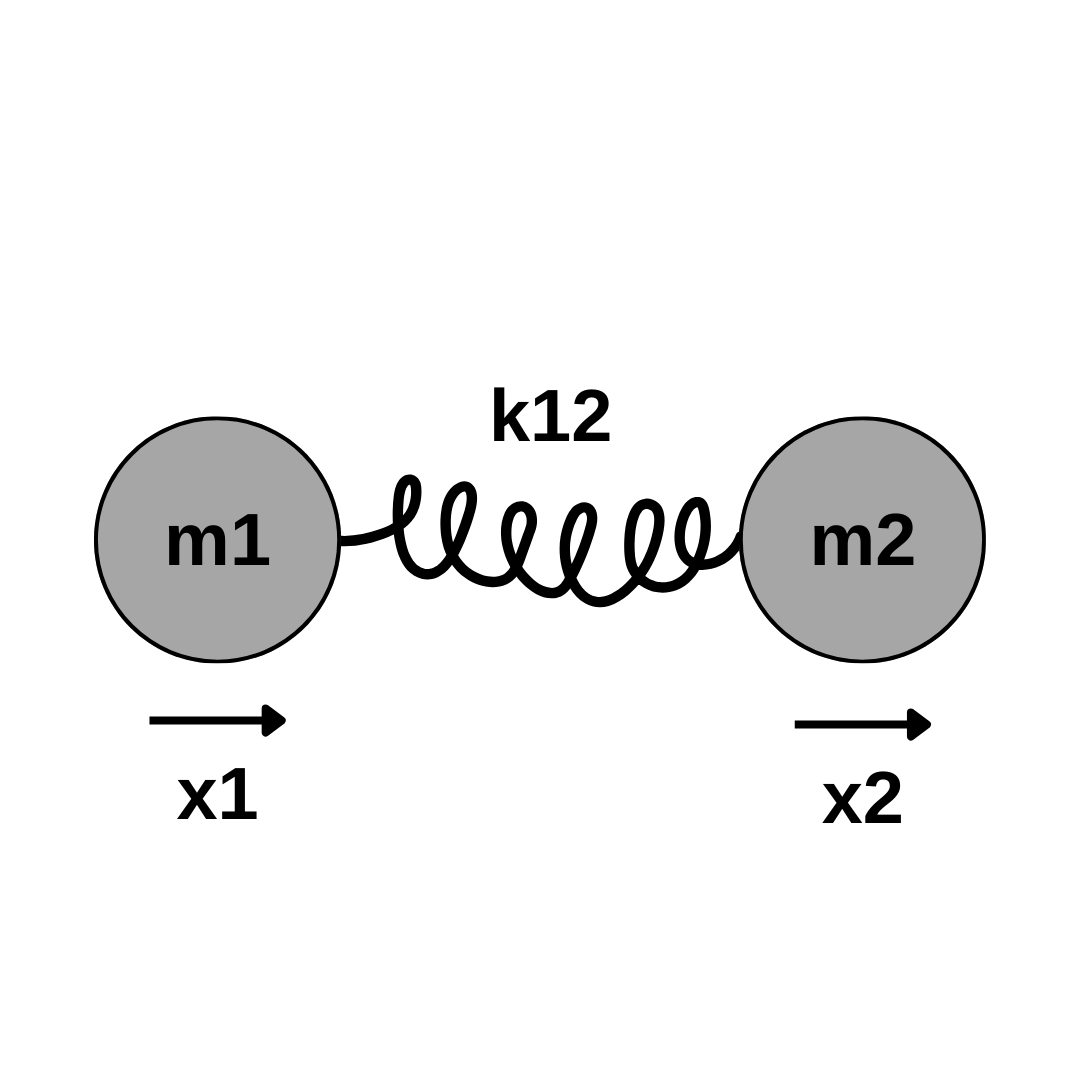

In order to create $\mathbf{B}$, use (10).

For $k=j=1$:
$$
\sqrt{\mathbf{M}}\mathbf{B}|{1,1}\rangle = \sqrt{\kappa_{11}}|{1}\rangle

$$

$$
\mathbf{B}|{1,1}\rangle = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} 
$$

$$
\mathbf{B}\begin{pmatrix}
    1 \\
    0 \\
    0
\end{pmatrix} = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} \qquad (15)
$$

For $k=1$ and $j=2$:
$$
\sqrt{\mathbf{M}}\mathbf{B}|{1,2}\rangle = \sqrt{\kappa_{12}}\left( |{1}\rangle - |{2} \rangle \right) 
$$

$$
\mathbf{B}|{1,2}\rangle = \left( |{1}\rangle - |{2} \rangle \right) 
$$

$$
\mathbf{B} \begin{pmatrix}
    0 \\
    1 \\
    0
\end{pmatrix} = \begin{pmatrix}
    1 \\
    0
\end{pmatrix} - \begin{pmatrix}
    0 \\
    1
\end{pmatrix} 
$$

$$
\mathbf{B} \begin{pmatrix}
    0 \\
    1 \\
    0
\end{pmatrix} = \begin{pmatrix}
    1 \\
    -1
\end{pmatrix} \qquad (16)
$$

For $k=j=2$:
$$
\sqrt{\mathbf{M}}\mathbf{B}|{2,2}\rangle = \sqrt{\kappa_{22}}|{2} \rangle 
$$

$$
\mathbf{B}|{2,2}\rangle = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} 
$$

$$
\mathbf{B} \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} = \begin{pmatrix}
    0 \\
    0
\end{pmatrix} \qquad (17)
$$
Combining $(15), (16), (17)$
$$
\mathbf{B}\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{pmatrix} = \begin{pmatrix}
    0 & 1 & 0 \\
    0 & -1 & 0
\end{pmatrix} 
$$

$$
\mathbf{B} = \begin{pmatrix}
    0 & 1 & 0 \\
    0 & -1 & 0
\end{pmatrix} \qquad (18)
$$

Lastly, show that $\mathbf{B}\mathbf{B}^\dagger = \mathbf{A}$
$$
\begin{pmatrix}
    0 & 1 & 0 \\
    0 & -1 & 0
\end{pmatrix} \begin{pmatrix}
    0 & 0 \\
    1 & -1 \\
    0 & 0
\end{pmatrix} = \begin{pmatrix}
    1 & -1 \\
    -1 & 1
\end{pmatrix} \qquad (19)
$$
That ends the constitution of $\mathbf{B}$ for this example.

Following equation $(7)$ the Hamiltonian ($H$) for this case becomes
$$
\mathbf{H} = \begin{pmatrix}
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix} \qquad (20)
$$

___

## Pre-Processing

Create necessary matrix and initial states using functions created in `ccho_helpers.py`

In [1]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from ccho_helpers import *
from classiq import (
    qfunc,
    QNum,
    QArray,
    QBit,
    allocate,
    bind,
    repeat,
    CX,
    control,
    PHASE,
    Output,
    prepare_amplitudes,
    create_model,
    set_execution_preferences,
    synthesize,
    execute,
    suzuki_trotter,
    exponentiation_with_depth_constraint,
    show,
    Constraints,
    set_constraints,
) 
from classiq.execution import ExecutionPreferences, ClassiqBackendPreferences, IBMBackendPreferences, IBMBackendProvider, IonqBackendPreferences, GCPBackendPreferences

In [2]:
## Creating the 2 masses system

# Number of masses
N =2**1

# ass Matrix
M = np.array([[1,0],[0,1]])

# Spring Matrix
K = np.array([[0,1],[1,0]])

# Initial Conditions
x_0 = np.zeros([N,1])
xdot_0 = np.zeros([N,1])
x_0[1] = 1

# F Matrix
F= create_matrix_F(K, N)

# A Matrix
A = create_matrix_A(M, F)

# Transform coordinates
y = coordinate_transformation(M, x_0, xdot_0)
y_0 = y["y_0"]
ydot_0 = y["ydot_0"]

# B Matrix
B = create_matrix_B(M, K, A, N)

# Stacking B with zeros to get square matrix N^2 x N^2
B_padded = padding_B(B, N)

# Hamiltonian
H = create_Hamiltonian(B_padded)

# Initial State
init_state = create_init_state(B_padded, y_0, ydot_0, N)
E0_y = calculate_energy(y_0, ydot_0, M, K)

# Normalize the Initial State
normalization = normalize_init_state(init_state)
normalized_init_state = normalization["normalized_init_state"]
norm = normalization["norm"]

# Print the results
print("Initial Energy: ", E0_y)
print("B matrix: ", B)
print("Hamiltonian formed:", H)
print("Initial State:", init_state)

Initial Energy:  0.5
B matrix:  [[ 0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j]]
Hamiltonian formed: [[-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -1.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  1.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-1.+0.j  1.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]]
Initial State: [[ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [-0.-1.j]
 [ 0.+0.j]
 [ 0.+0.j]]


## Pauli Matrix Decomposition

Create the Pauli List for the Hamiltonian. Pauli Decomposition is taken from [Classiq Library](https://github.com/Classiq/classiq-library/blob/main/algorithms/hhl/hhl/hhl.ipynb) thanks a lot to the authors!

In [3]:
## Pauli Decomposition and transforming it into Classiq syntax

# Create the Pauli Matrix Decomposition of the Hamiltonian
pauli_list = lcu_naive(H)

# Transform Pauli Matrix Decomposition to Classiq compatible
classiq_pauli_list = pauli_list_to_hamiltonian(pauli_list)

print(pauli_list)

100%|██████████| 64/64 [00:00<00:00, 15995.44it/s]

[('XII', (0.25+0j)), ('XIZ', (-0.25+0j)), ('XIX', (-0.25+0j)), ('XZI', (0.25+0j)), ('XZZ', (-0.25+0j)), ('XZX', (-0.25+0j)), ('YIY', (0.25+0j)), ('YZY', (0.25+0j))]


## Hamiltonian Simulation with Different Hardwares

We use the `exponantion_with_depth_constraint` function of classiq that produces a quantum gate that approximates $e^{iHt}$, for any input **Hermitian operator** $H$. Since the Hamiltonian for this algorithm is Hermitian by definition, exponentiation methods can be used straightforwardly.

In [13]:
# Add i phase for the last half
@qfunc
def init_state_phase(state: QNum):
    """
        Definition:
            Imply -pi/2 phase to the last half (msb qubit) of the QNum state in order to add -i factor
        Args:
            state (QNum): Initial state with bare amplitudes
        Outputs:
            state (QNum): Initial state with phase
    """

    state_in_qubit = QArray("state_in_qubit")
    msb = QArray("msb", QBit)
    
    size = np.log2(init_state.size)
    allocate(size, msb)

    bind(state, state_in_qubit)
    repeat(state_in_qubit.len, lambda i: CX(state_in_qubit[i], msb[i]))
    control(msb[size-1], lambda: PHASE(np.pi/2, state_in_qubit[size-1]))
    bind(state_in_qubit, state)

# Main function with suzuki_trotter
@qfunc
def main(state: Output[QNum]):
    """
        Definition:
            Main function to make evolution

        Outputs:
            state (Output[QNum]): Resulting state at the t = evolution_coefficient
    """
        
    prepare_amplitudes(amplitudes=list(normalized_init_state), out=state, bound=0.00000000000001)
    init_state_phase(state)

    exponentiation_with_depth_constraint(
        classiq_pauli_list,
        evolution_coefficient=0.5,
        max_depth=10000,
        qbv=state)

qmod = create_model(main)

In [14]:
# Create model and synthesis. Use "simulator_statevector" to take phases into account
backend_preferences = ClassiqBackendPreferences(backend_name="simulator_statevector")
model_pref = set_execution_preferences(qmod, ExecutionPreferences(num_shots=1000, backend_preferences=backend_preferences))
qprog = synthesize(model_pref)

In [15]:
# Execute the job
job = execute(qprog)
parsed_state_vector = job.result()[0].value.parsed_state_vector

## Post-Processing
- Obtain final state and derive final velocity and positions

In [16]:
# Combine the final results
state_amplitudes = sum_amplitudes_by_state(parsed_state_vector, N)

# Normalize the global phase
normalized_final_state = normalize_final_state(state_amplitudes, parsed_state_vector)

# Eliminate small numbers
simplified_final_state = simplify_final_state(normalized_final_state)

# Renormalize the final state using the norm of initial state
final_state = norm * simplified_final_state[..., None]

# Get the final position and velocity vectors
final_results = post_process_final_state(final_state, B_padded, N, y_0)
y_final = final_results["y_final"]
ydot_final = final_results["ydot_final"]

# Transform coordinates from y to x
x_final_results = back_coordinate_transformation(M, y_final, ydot_final)
x_final = x_final_results["x_final"]
xdot_final = x_final_results["xdot_final"]

print("Final Positions", x_final)
print("Final Velocities", xdot_final)

Final Positions [[0.11987767+0.j]
 [0.88012232+0.j]]
Final Velocities [[ 0.45936257+0.j]
 [-0.45936271+0.j]]


## Classical Solution and Comparision
Obtain the result numerically

In [17]:
## Get classical results

def equations_of_motion(t, init, N, M, K):
    """
    Definition:
        EOM for classical coupled oscillator system with N masses
    Args:
        t (array): Time array
        init (list): Initial Conditions
        N (int): Number of masses
        M (array): Mass matrix (diagonal)
        K (array): Spring constant matrix
    Output:
        (list): List of final equations
    """

    x = init[:N]
    v = init[N:]
    dxdt = v
    dvdt = np.zeros(N)
    
    for i in range(N):
        if i == 0:
            dvdt[i] = (-K[i, i] * x[i] + K[i, i+1] * (x[i+1] - x[i])) / M[i, i]
        elif i == N-1:
            dvdt[i] = (-K[i, i] * x[i] + K[i, i-1] * (x[i-1] - x[i])) / M[i, i]
        else:
            dvdt[i] = (-K[i, i] * x[i] + K[i, i-1] * (x[i-1] - x[i]) + K[i, i+1] * (x[i+1] - x[i])) / M[i, i]

    return np.concatenate((dxdt, dvdt))


# Initial conditions: [x1(0), x2(0), ..., xN(0), v1(0), v2(0), ..., vN(0)]
initial_conditions = np.concatenate((x_0, xdot_0))


# Time span for the simulation
t_span = (0, 0.5)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the system of differential equations
solution = scipy.integrate.solve_ivp(equations_of_motion, t_span, initial_conditions.flatten(), t_eval=t_eval, args=(N, M, K))

# Extract the results
t = solution.t
x = solution.y[:N, :]
v = solution.y[N:, :]

# Get the results numerically
x_classic =np.array([x[0][-1], x[1][-1]])
xdot_classic =np.array([v[0][-1], v[1][-1]])

print("Position Vectors at t=0.5 classically")
print(x_classic)
print("Velocity Vectors at t=0.5 classically")
print(xdot_classic)


Position Vectors at t=0.5 classically
[0.11988439 0.88011561]
Velocity Vectors at t=0.5 classically
[ 0.45936539 -0.45936539]


In [18]:
## Compare classical and quantum results
# Compare two solutions
comparision = calculate_error(x_final, xdot_final, x_classic, xdot_classic, N)
amplitude_error = comparision["amplitude_error"]
sign_error = comparision["sign_error"]

for i in range(1, N+1):
    print(f"Error Percentage in Position of Mass {i}: ", amplitude_error[f"Position of Mass {i}"], "Sign Check: ", sign_error[f"Position of Mass {i}"])
    
for j in range(1, N+1):
    print(f"Error Percentage in Velocity of Mass {j}: ", amplitude_error[f"Velocity of Mass {j}"], "Sign Check: ", sign_error[f"Velocity of Mass {i}"])

Error Percentage in Position of Mass 1:  0.005606673488448323 Sign Check:  +
Error Percentage in Position of Mass 2:  0.0007625122836408016 Sign Check:  +
Error Percentage in Velocity of Mass 1:  0.0006135960848431218 Sign Check:  +
Error Percentage in Velocity of Mass 2:  0.0005852448955836466 Sign Check:  +


## Discussion and Results
Results show that, at least for the toy example, quantum algorithm works quite well. However, there are some points to be mentioned:
- Even though velocities are computed straightforwardly from the final state, positions can be computed uniquely only if $B$ is not singular. That is because of the $B^\dagger$ factor at last half of the state. Positions can also be estimated using the sum of initial positions if there is not initial velocities since in that case, masses would displace in a way such that the absolute displacement can be protected. In our toy example, initial velocities equal to zero, so the results are pretty accurate. For general case, it is more reasonable to look at the fidelity of the final states computed classically and quantum algorithmically.
- State vector simulations are equivalent up to a global phase. We try to eliminate global phase by making the phase of first entry 0, yet that may create a sign flip in certain situations, which can result in reversed positions

## References
- [1](https://arxiv.org/abs/2303.13012) Exponential Quantum Speedup in Simulating Coupled Classical Oscillators, Babbush et.al, 2023
- [2](https://github.com/Classiq/classiq-library/blob/main/algorithms/hhl/hhl/hhl.ipynb) Classiq Tutorial for HHL
- [3](https://docs.classiq.io/latest/) Classiq Documentation
- Thanks to Eden Schirman, Tomer Goldfriend, and all the Classiq crew!
- Special thanks to Womanium crew for designing and organizing such a good program!